# Autotrader_4_dtr_rfr_etr
---

In [1]:
# import packages (pd, viz)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

# import myfunctions.py (functions used in multiple notebooks)
import myfunctions

# import packages (preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# import packages (models)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read in file

In [2]:
# Read in file
filepath = '../data/df_master_2.csv'
df = pd.read_csv(filepath, index_col=0)
print(df.shape)

# Set features and target
X = df.copy()
y = X.pop('price')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(14996, 13)


((11996, 12), (3000, 12), (11996,), (3000,))

# Define Functions
1. pipe_construct: construct a pipeline according to input features and choice of model
2. plot_coef_pipe: function to plot resulting coefficients from fitted pipe

In [3]:
# Define input features 
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

def pipe_construct(features_cont=features_cont, features_cat=features_cat, model=DecisionTreeRegressor()):
    '''
    Input: continuous features, categorical features, model of choice. 
    Returns: pipeline.
    '''
    t = [('cont', StandardScaler(), features_cont), 
         ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), features_cat)]

    transformer = ColumnTransformer(transformers=t, remainder='drop')

    pipe = Pipeline(steps=[('transformer', transformer), ('model', model)])
    return pipe


def plot_coef_pipe(pipe, X_train, X_test, y_train, y_test):
    '''plot coefficients from a model'''
    # df for model coefficients    
#     col_names = features_cont + list(transformer.named_transformers_.cat.get_feature_names())
    col_names = features_cont + list(pipe.named_steps.transformer.named_transformers_.cat.get_feature_names())
    
    df_model_coef = pd.DataFrame(pipe.named_steps.model.coef_, index=col_names, columns=['coef'])
    df_model_coef['coef_abs'] = np.abs(df_model_coef)
    
    # plot coefficients in order of importance
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    plt.tight_layout(w_pad=10)

    df_model_coef.coef.sort_values()[:10].plot(kind='barh', ax=ax[0])
    df_model_coef.coef.sort_values()[-10:].plot(kind='barh', ax=ax[1])

    ax[0].set_title('Feature Importance (negative impact)')
    ax[1].set_title('Feature Importance (positive impact)')

    print('Coefficients:')
    plt.show()
    

def plot_feat_imp(pipe, X_train, X_test, y_train, y_test, n_features=10):
    '''
    Plot feature importances from model.
    Input: pipe, X_train, X_test, y_train, y_test, n_features (number of features to show).
    Returns: plot of feature importances.
    '''
    # dataframe for feature importances
    col_names = features_cont + list(pipe.named_steps.transformer.named_transformers_.cat.get_feature_names())
    df_feat_imp = pd.DataFrame(pipe.named_steps.model.feature_importances_, index=col_names, columns=['feat_imp'])

    # plot of feature importances
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    df_feat_imp.sort_values(by='feat_imp')[-n_features:].plot(kind='barh', ax=ax)
    ax.set_title('Feature Importances')
    plt.show()

# 1. Decision Tree Regressor (default)

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

DecisionTreeRegressor(random_state=1)

R2 Train, Test:		0.9986513456622118 	 0.8201020789391774
R2 Train (CV Mean):	0.9136048286088931

RMSE Train, Test:	1094.0689232009179 	 12223.271955635526
MAE  Train, Test:	22.59144714904968 	 2866.705444444444

Predictions:


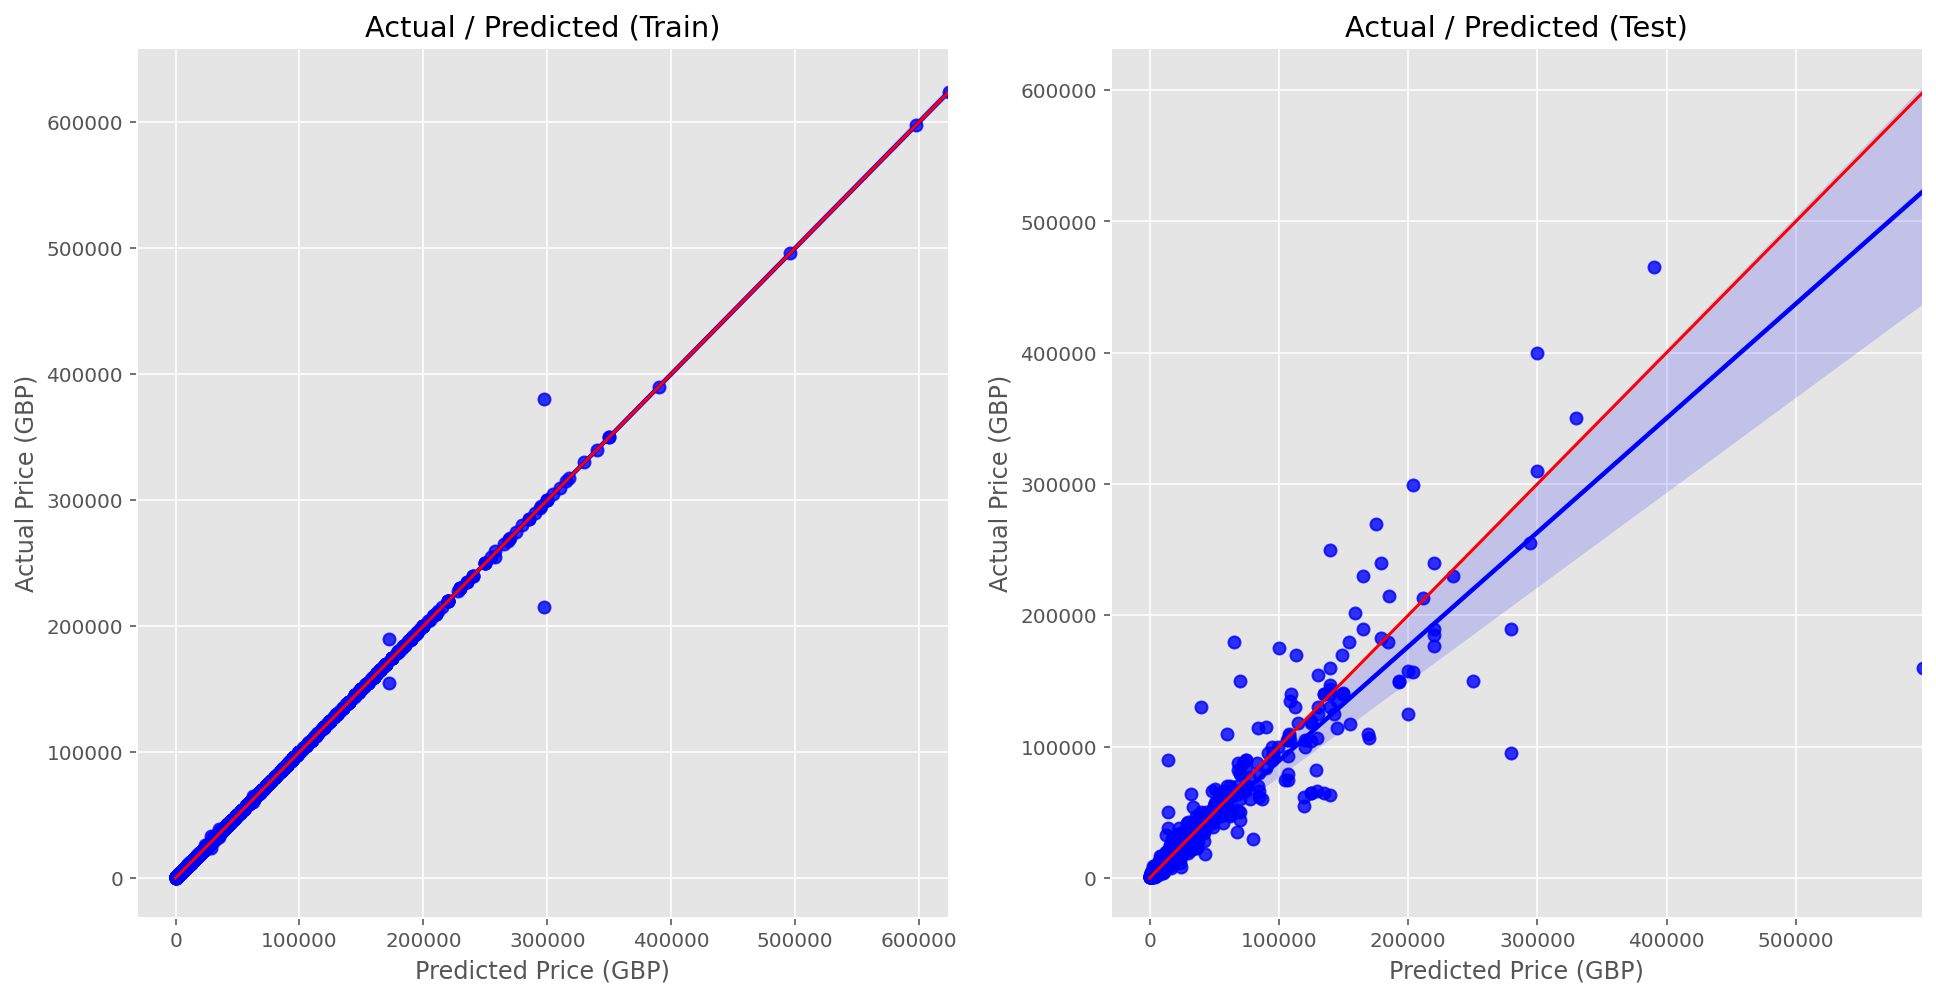

Distribution of residuals:


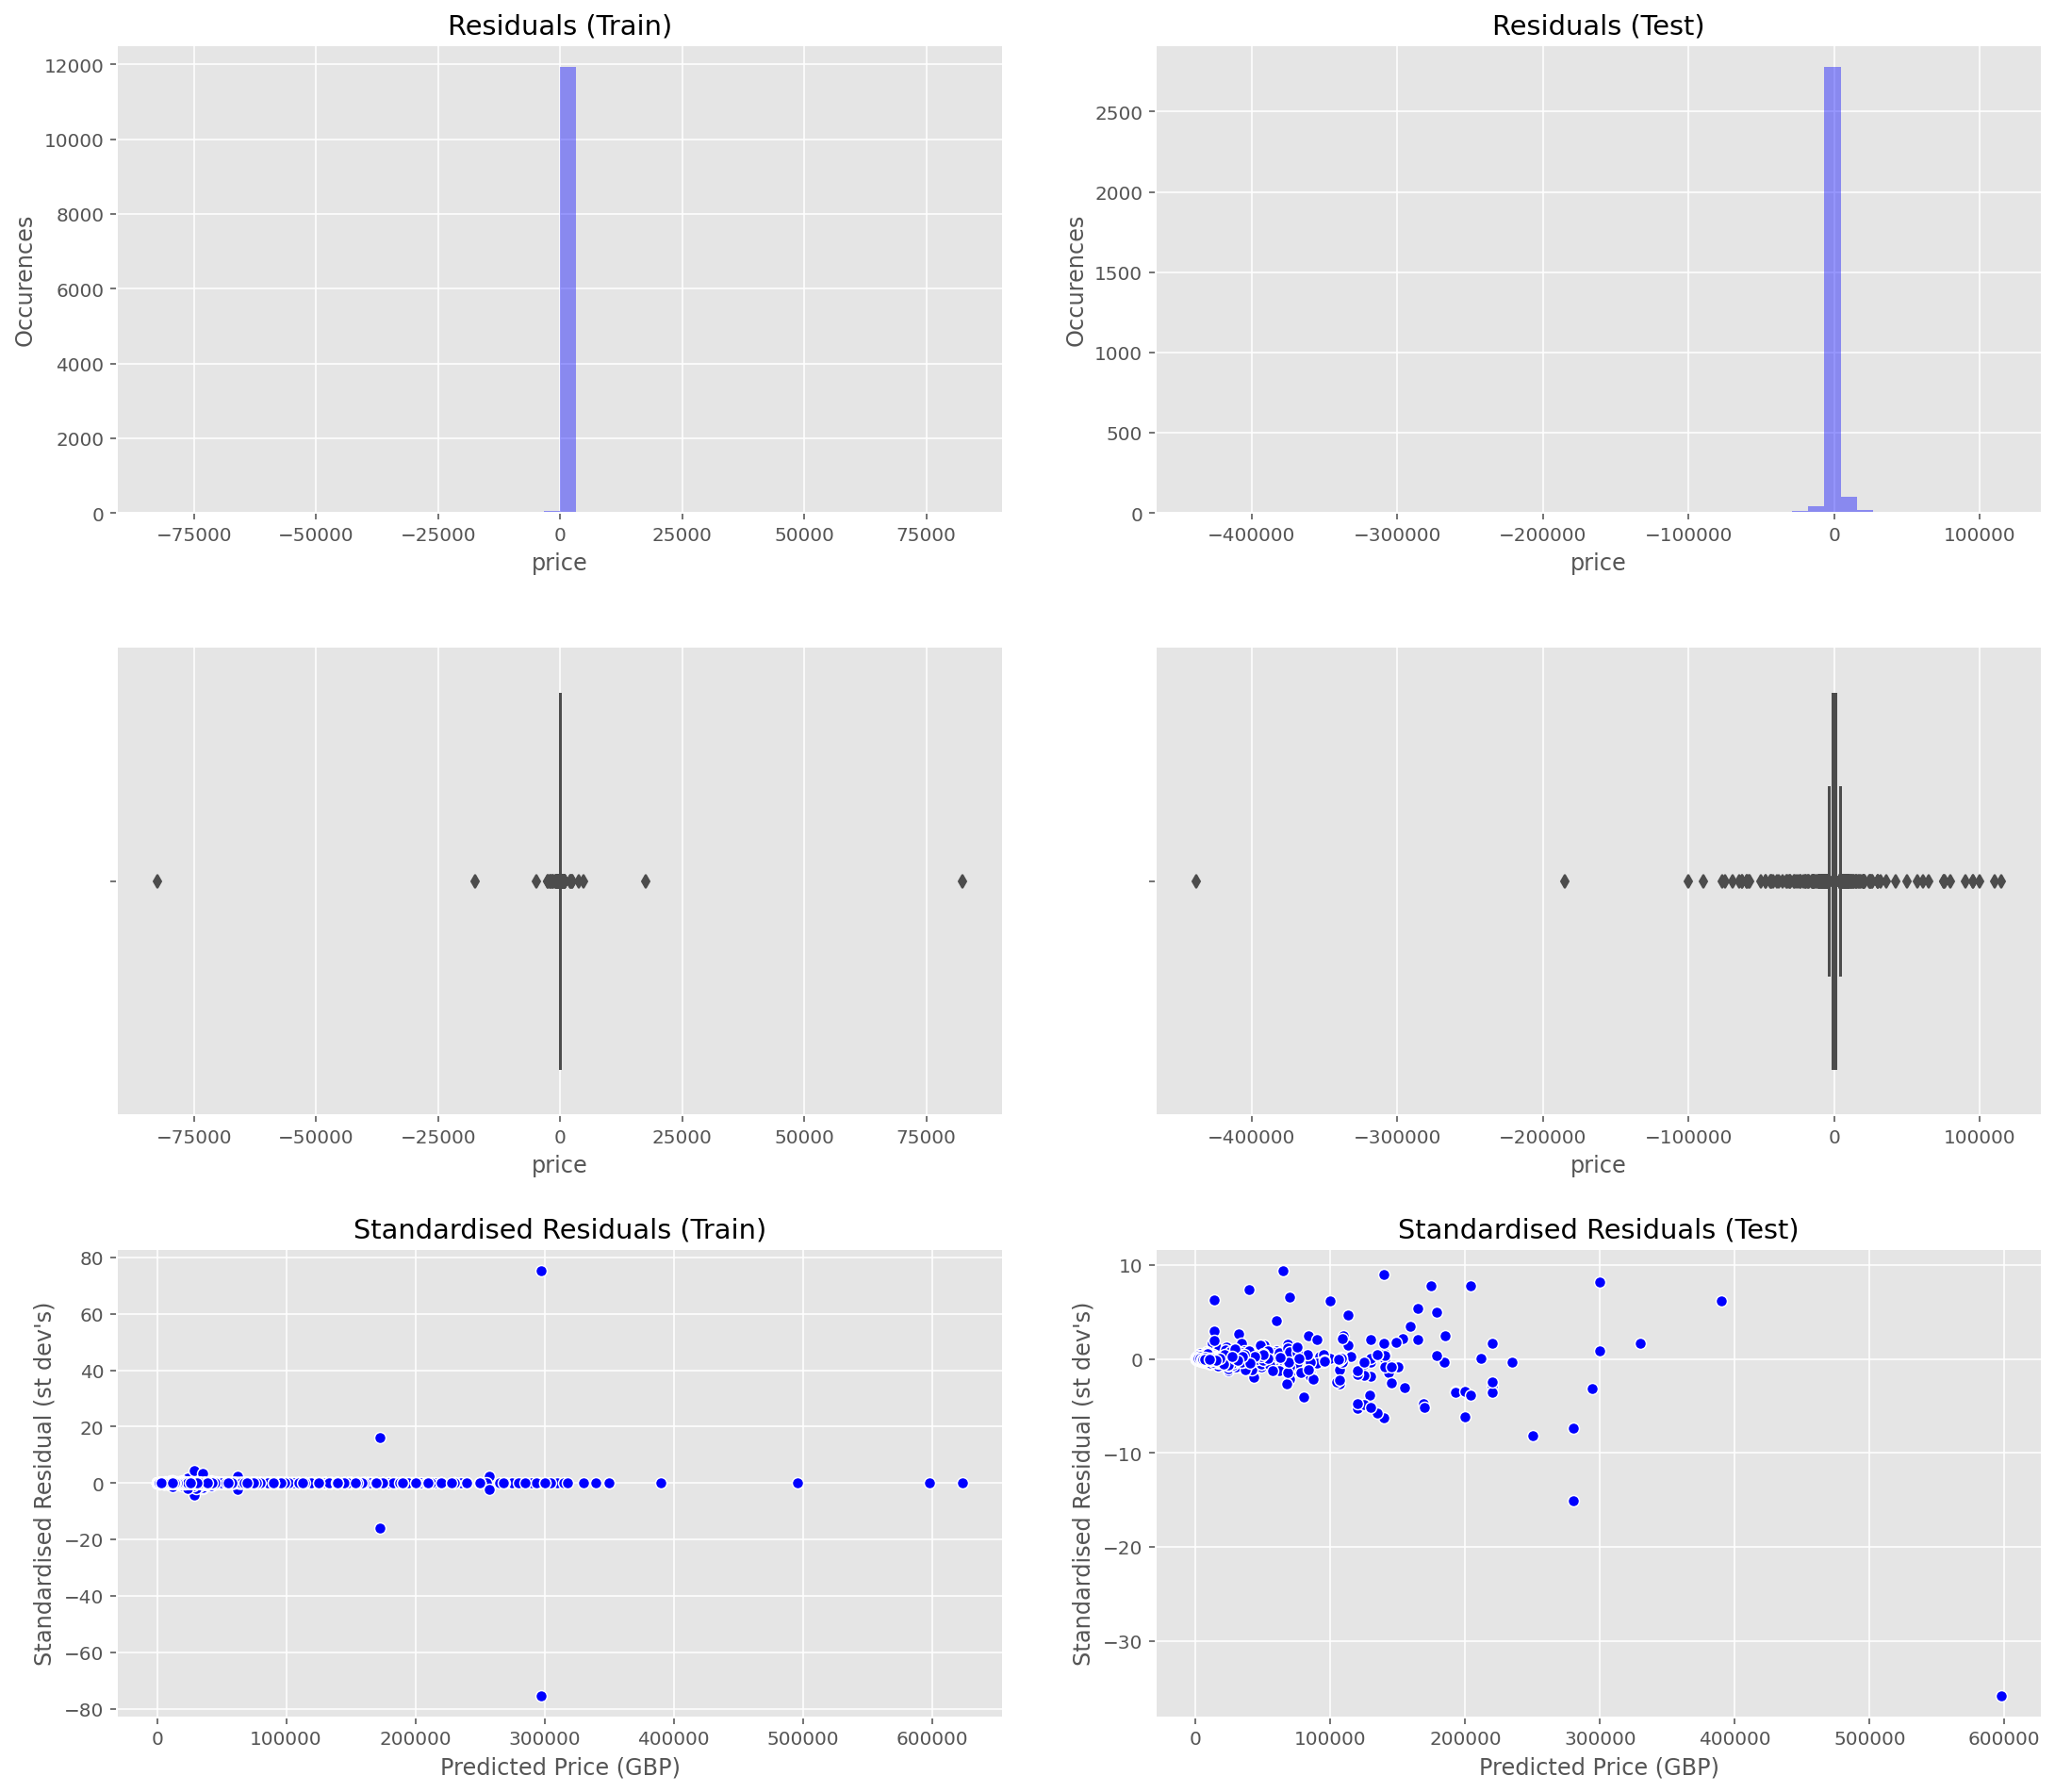

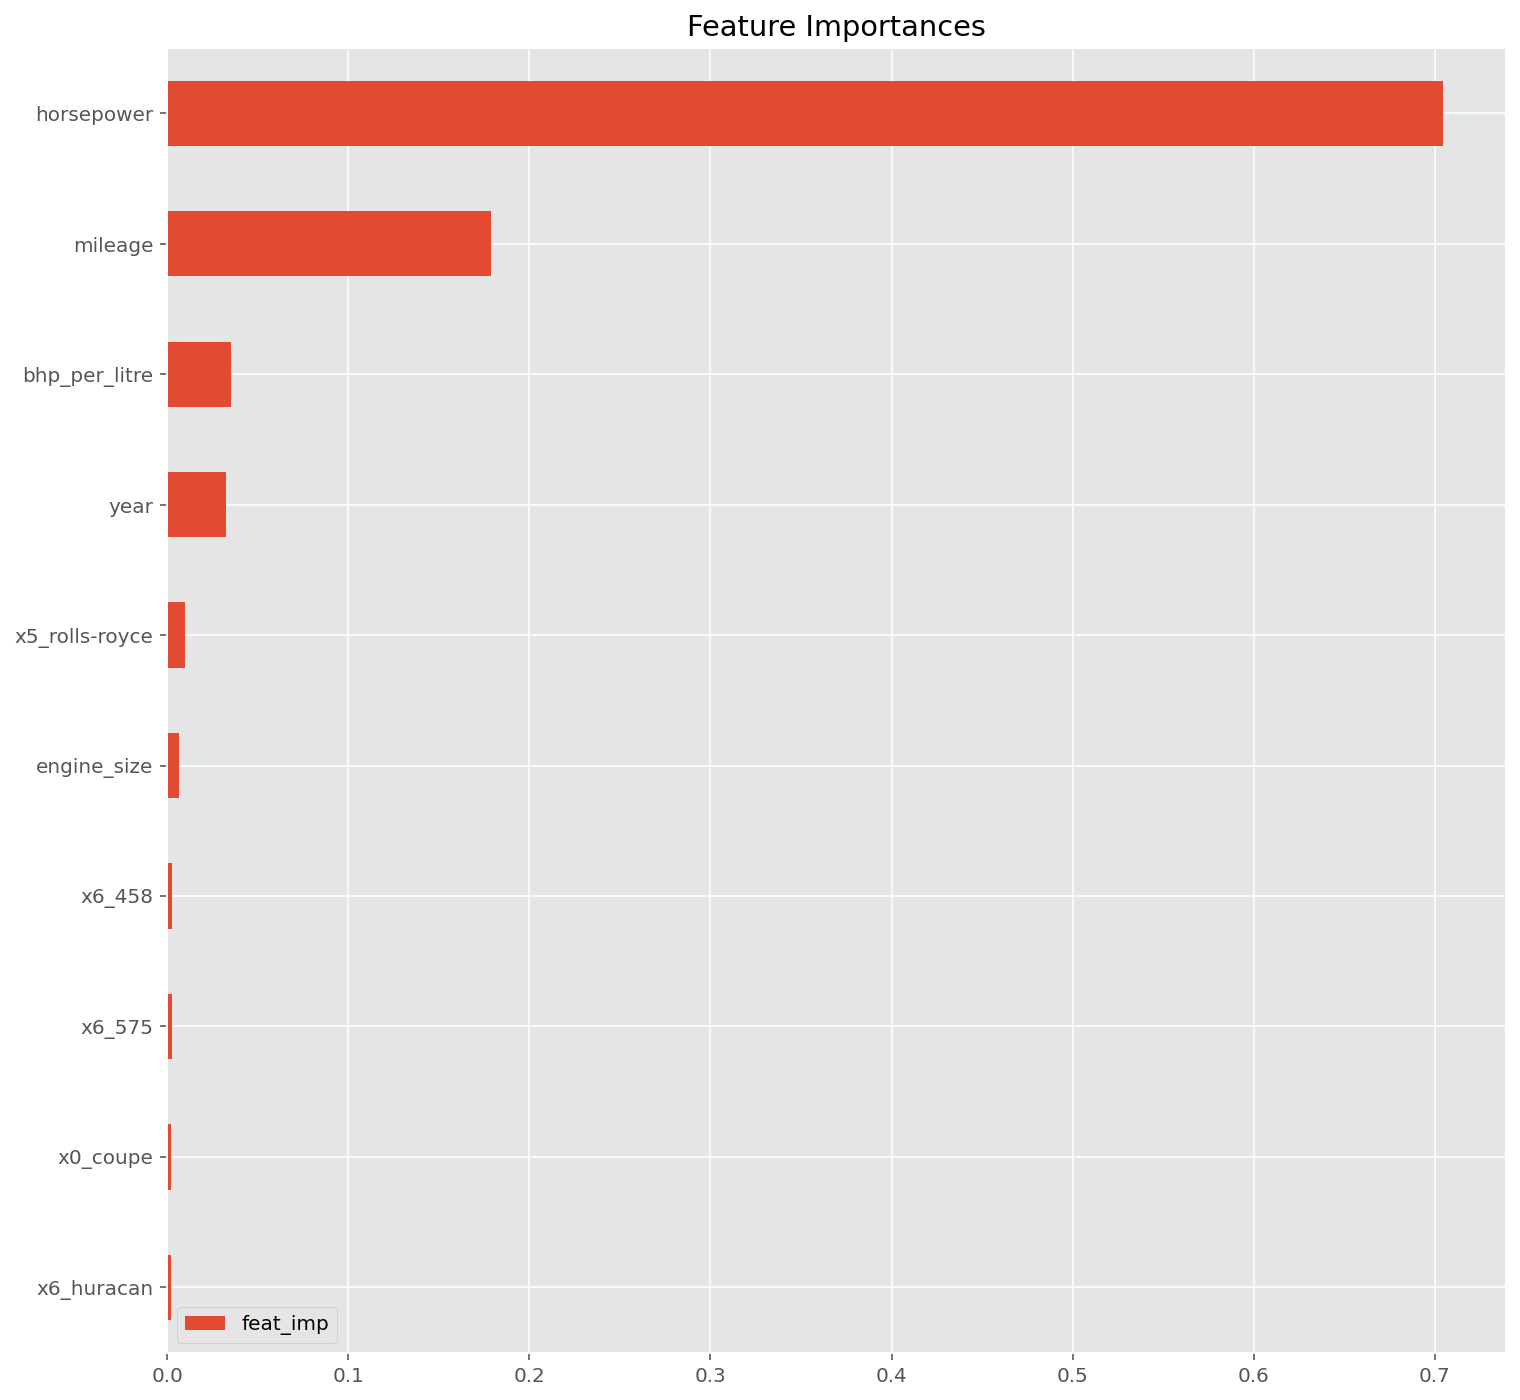

In [5]:
# DecisionTreeRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, DecisionTreeRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# plots
myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

# 2. Random Forest Regressor (default)

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

RandomForestRegressor(random_state=1)

R2 Train, Test:		0.992160529393702 	 0.9379386215255714
R2 Train (CV Mean):	0.9440761713816558

RMSE Train, Test:	2637.7748517012164 	 7179.34975085999
MAE  Train, Test:	745.378751816484 	 2048.357986809524

Predictions:


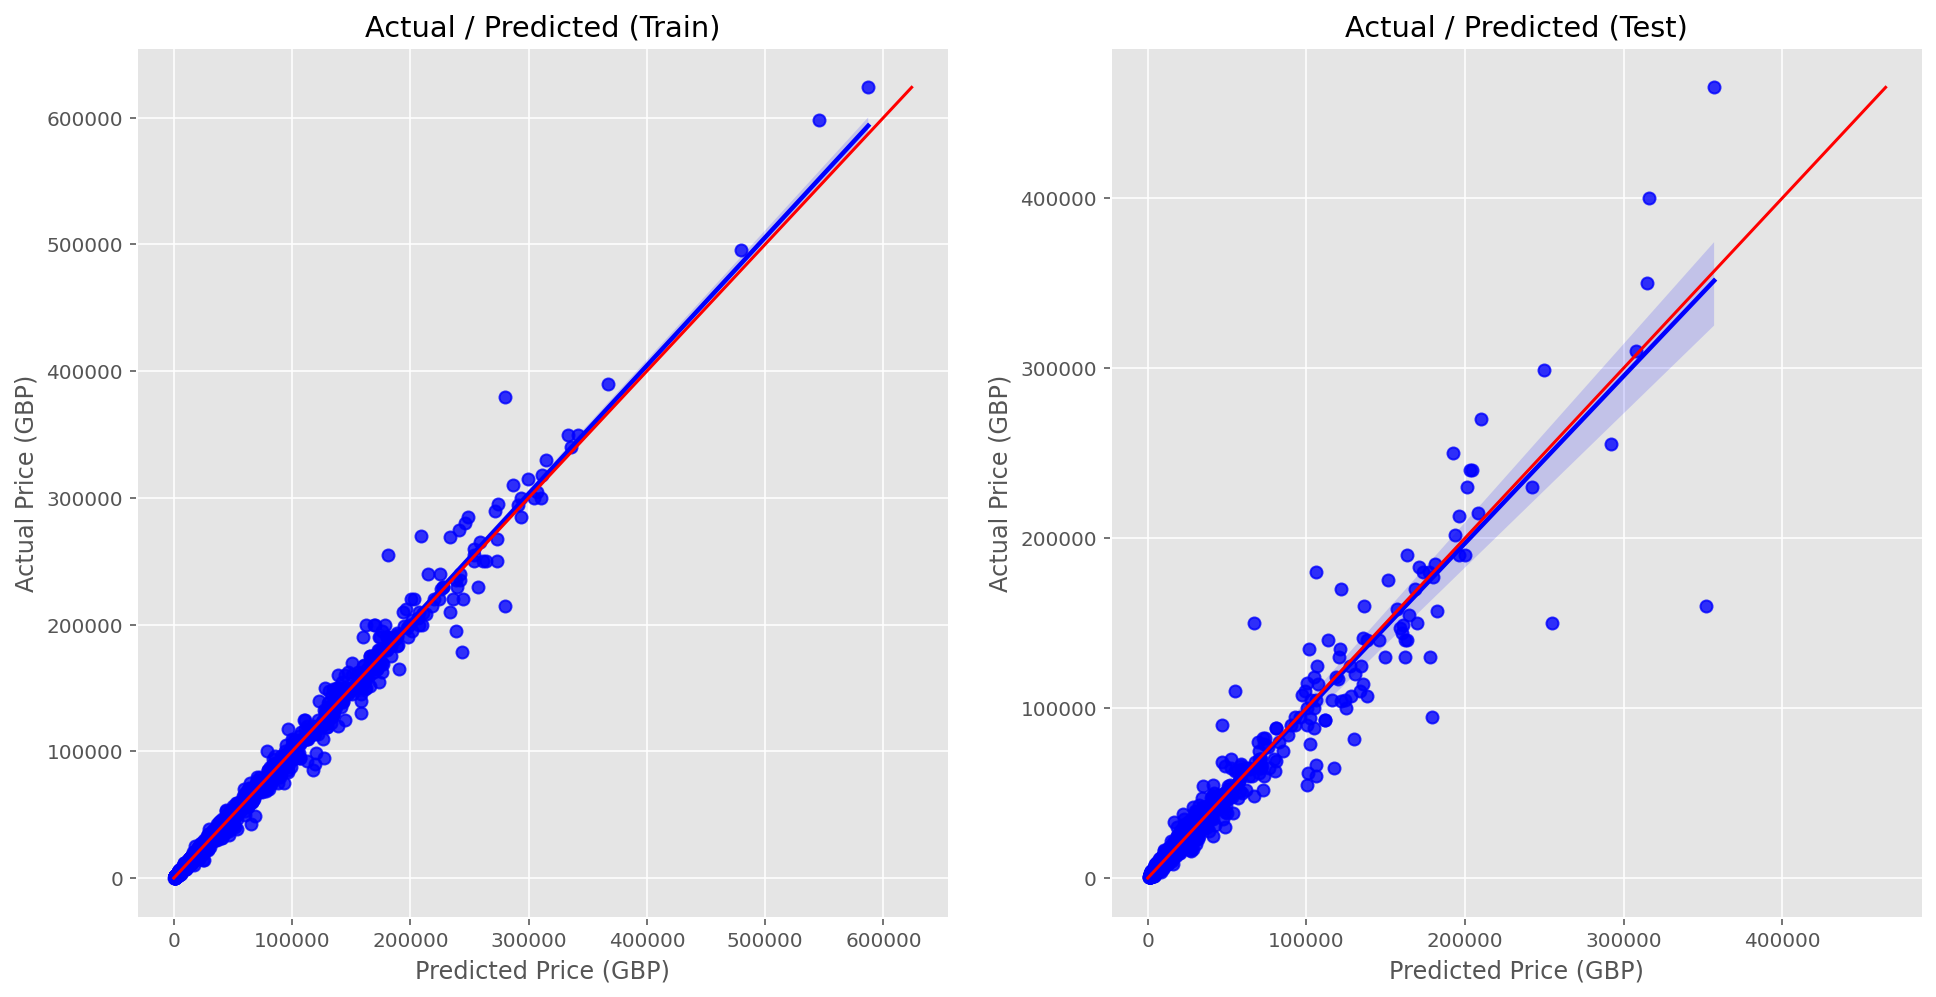

Distribution of residuals:


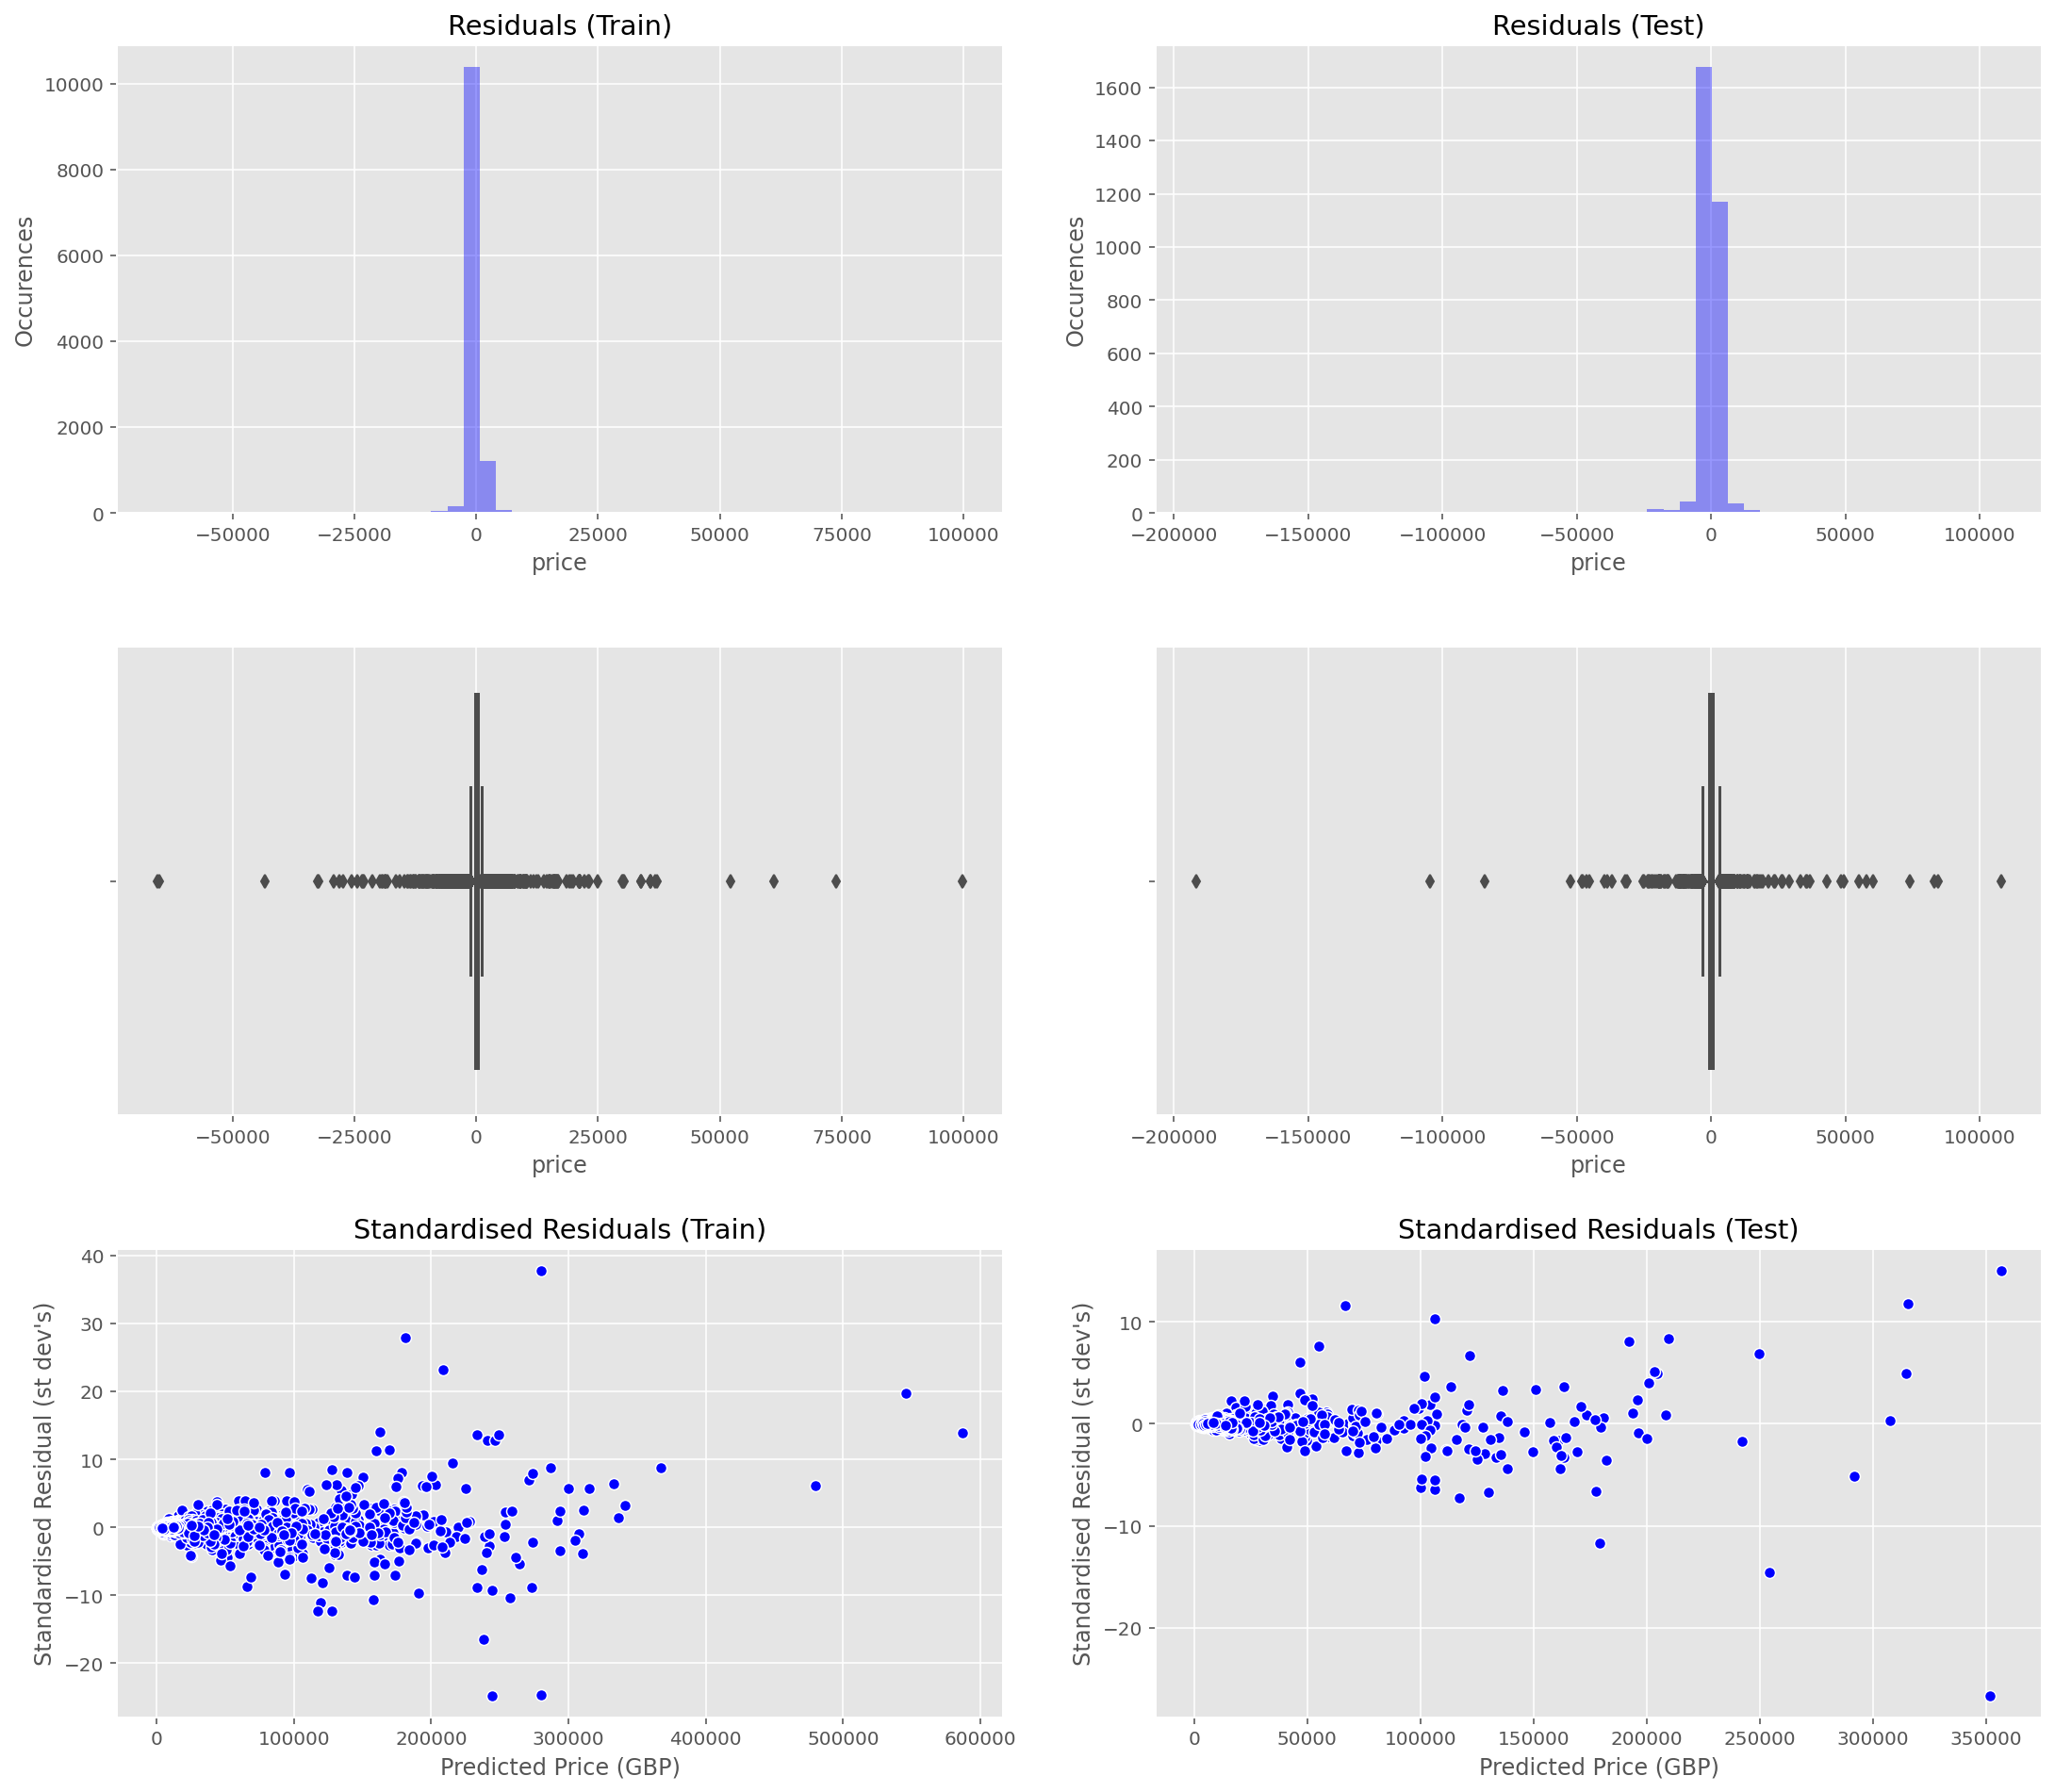

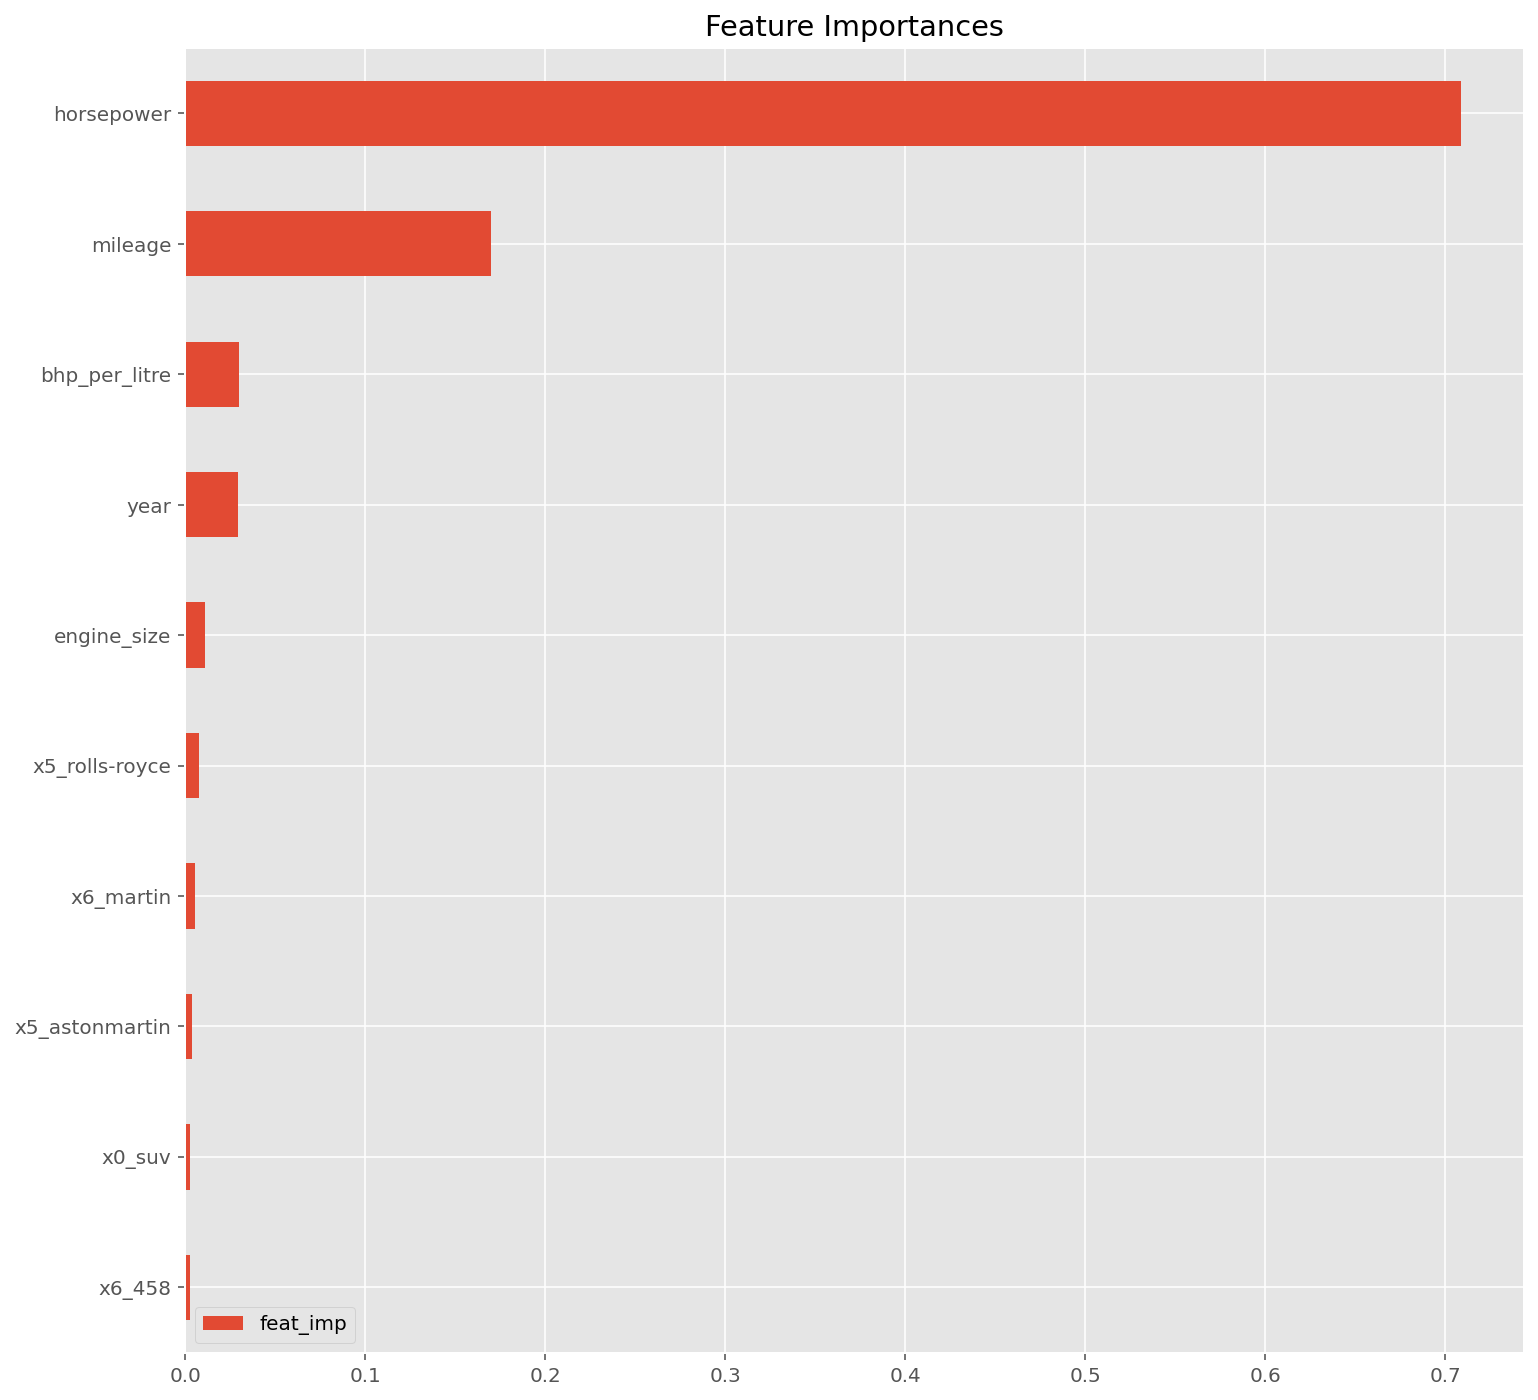

In [5]:
# RandomForestRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, RandomForestRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# plots
myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

In [17]:
dump(pipe, filename='autotrader_rfr_pipe_final.joblib')
dump(pipe.named_steps.model, filename='autotrader_rfr_model_final.joblib')

['autotrader_rfr_model_final.joblib']

# 3. Grid Search (Random Forest)

In [14]:
param_grid = {
    'n_estimators':[100, 500],
#     criterion='mse',
    'max_depth':[10, 50, 100, None],
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
    'max_features':['auto'],
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
    'oob_score':[True, False],
    'n_jobs':[-1],
    'random_state':[None],
    'verbose':[0],
#     warm_start=False,
#     ccp_alpha=0.0,
#     max_samples=None
}

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': ['auto'], 'n_estimators': [100, 500],
                         'n_jobs': [-1], 'oob_score': [True, False],
                         'random_state': [None], 'verbose': [0]},
             verbose=1)

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 21.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': ['auto'], 'n_estimators': [100, 500],
                         'n_jobs': [-1], 'oob_score': [True, False],
                         'random_state': [None], 'verbose': [0]},
             verbose=1)

Train score:  0.9924552501827467
Test score:   0.9356834352269028
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 16.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.8min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.5min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 16.4min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 16.7min finished


CV mean:      0.9431304527806763

Predictions:


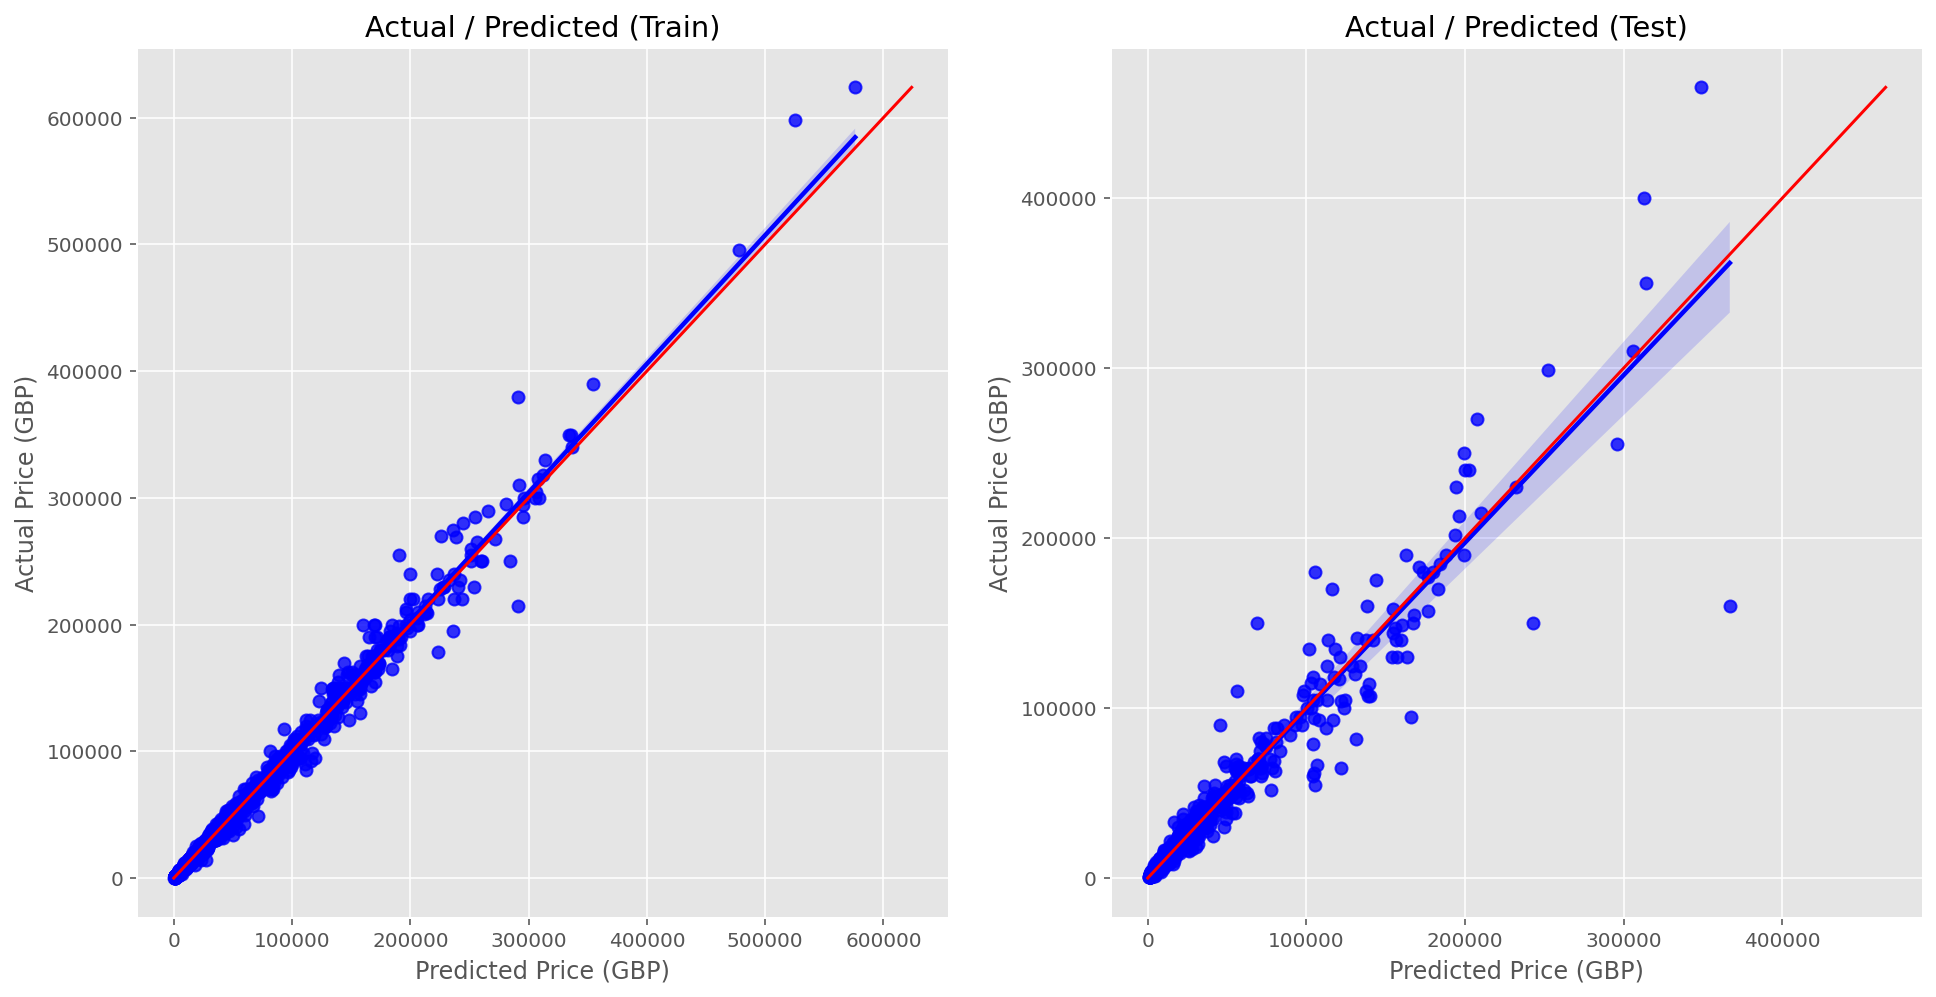

Distribution of residuals:


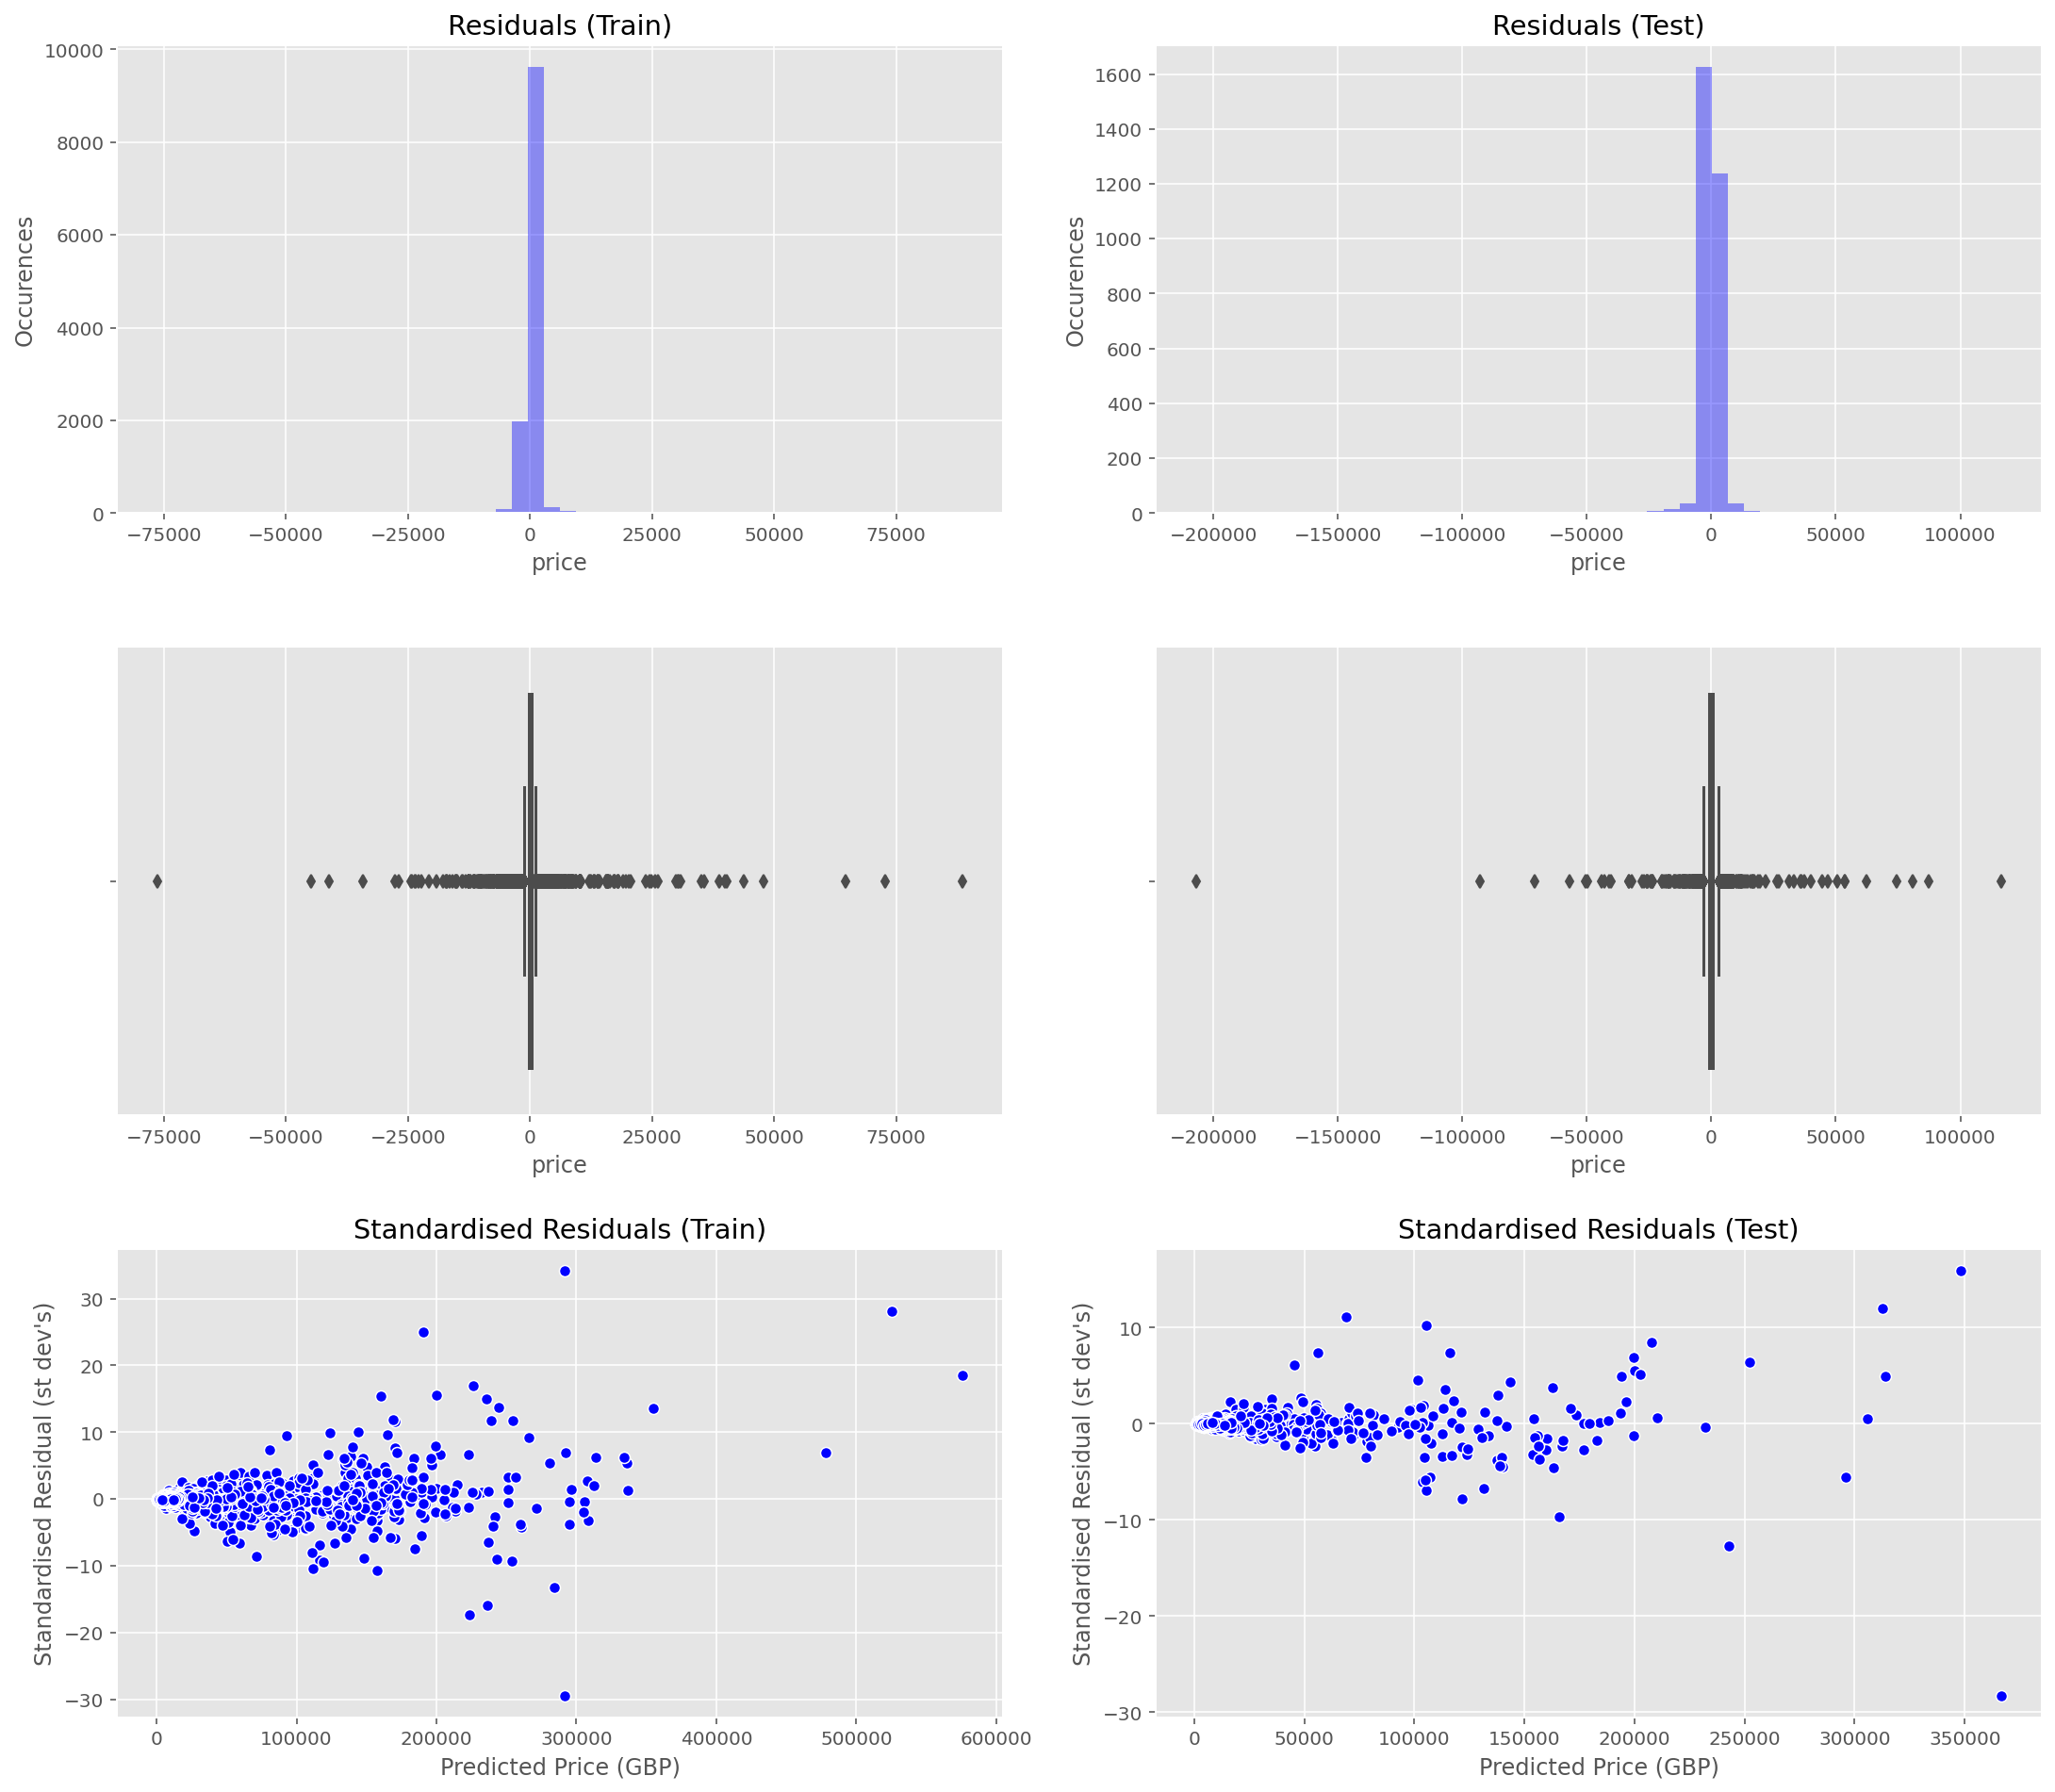

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [15]:
# RandomForestRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, grid)
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# plots
myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

In [30]:
dump(pipe, filename='autotrader_rfr_pipe.joblib')
dump(grid, filename='autotrader_rfr_grid.joblib')

['autotrader_rfr_grid.joblib']

In [35]:
print('Grid Parameters:\n')
print(grid.get_params)
print('\n')
print('Best Parameters:\n')
print(grid.best_params_)

Grid Parameters:

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': ['auto'], 'n_estimators': [100, 500],
                         'n_jobs': [-1], 'oob_score': [True, False],
                         'random_state': [None], 'verbose': [0]},
             verbose=1)>


Best Parameters:

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0}


# 4. Extra Trees Regressor

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

ExtraTreesRegressor(random_state=1)

R2 Train, Test:		0.9986513309315156 	 0.9663515556715334
R2 Train (CV Mean):	0.9585981575764118

RMSE Train, Test:	1094.074898176332 	 5286.361973867686
MAE  Train, Test:	22.68756252084029 	 1726.3641655555555

Predictions:


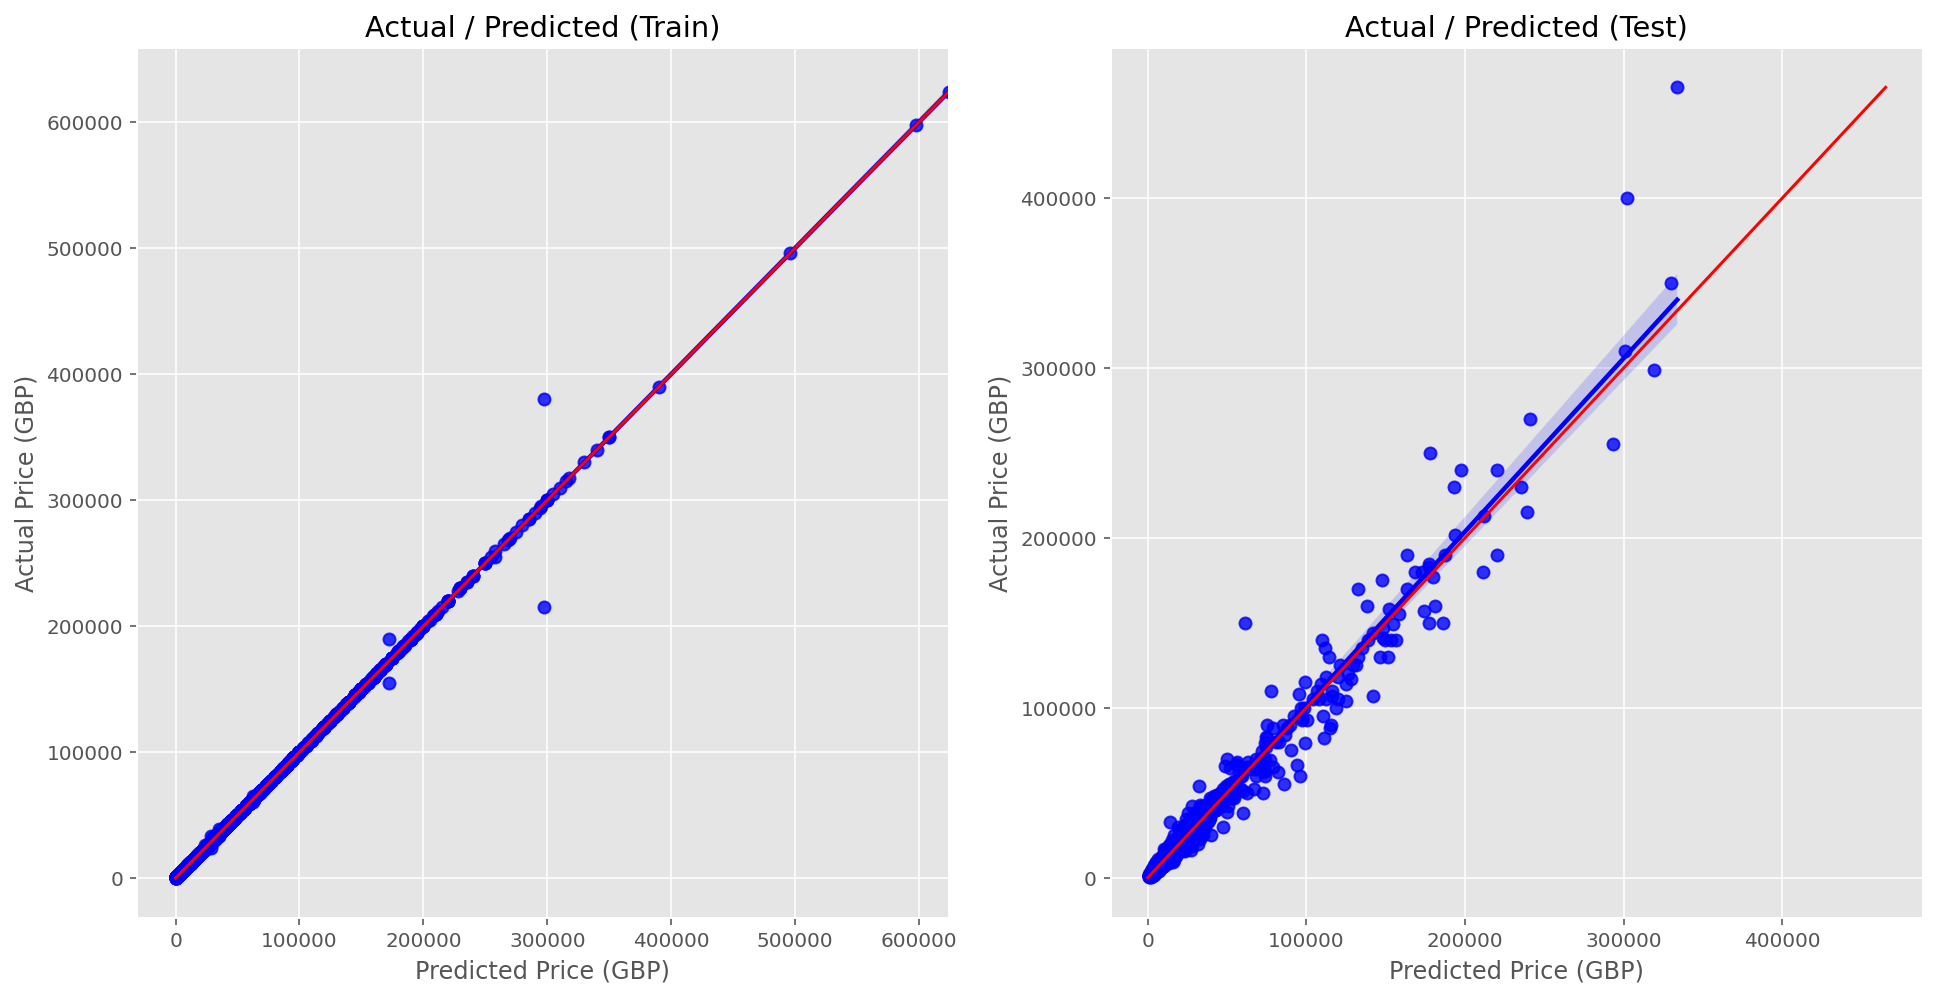

Distribution of residuals:


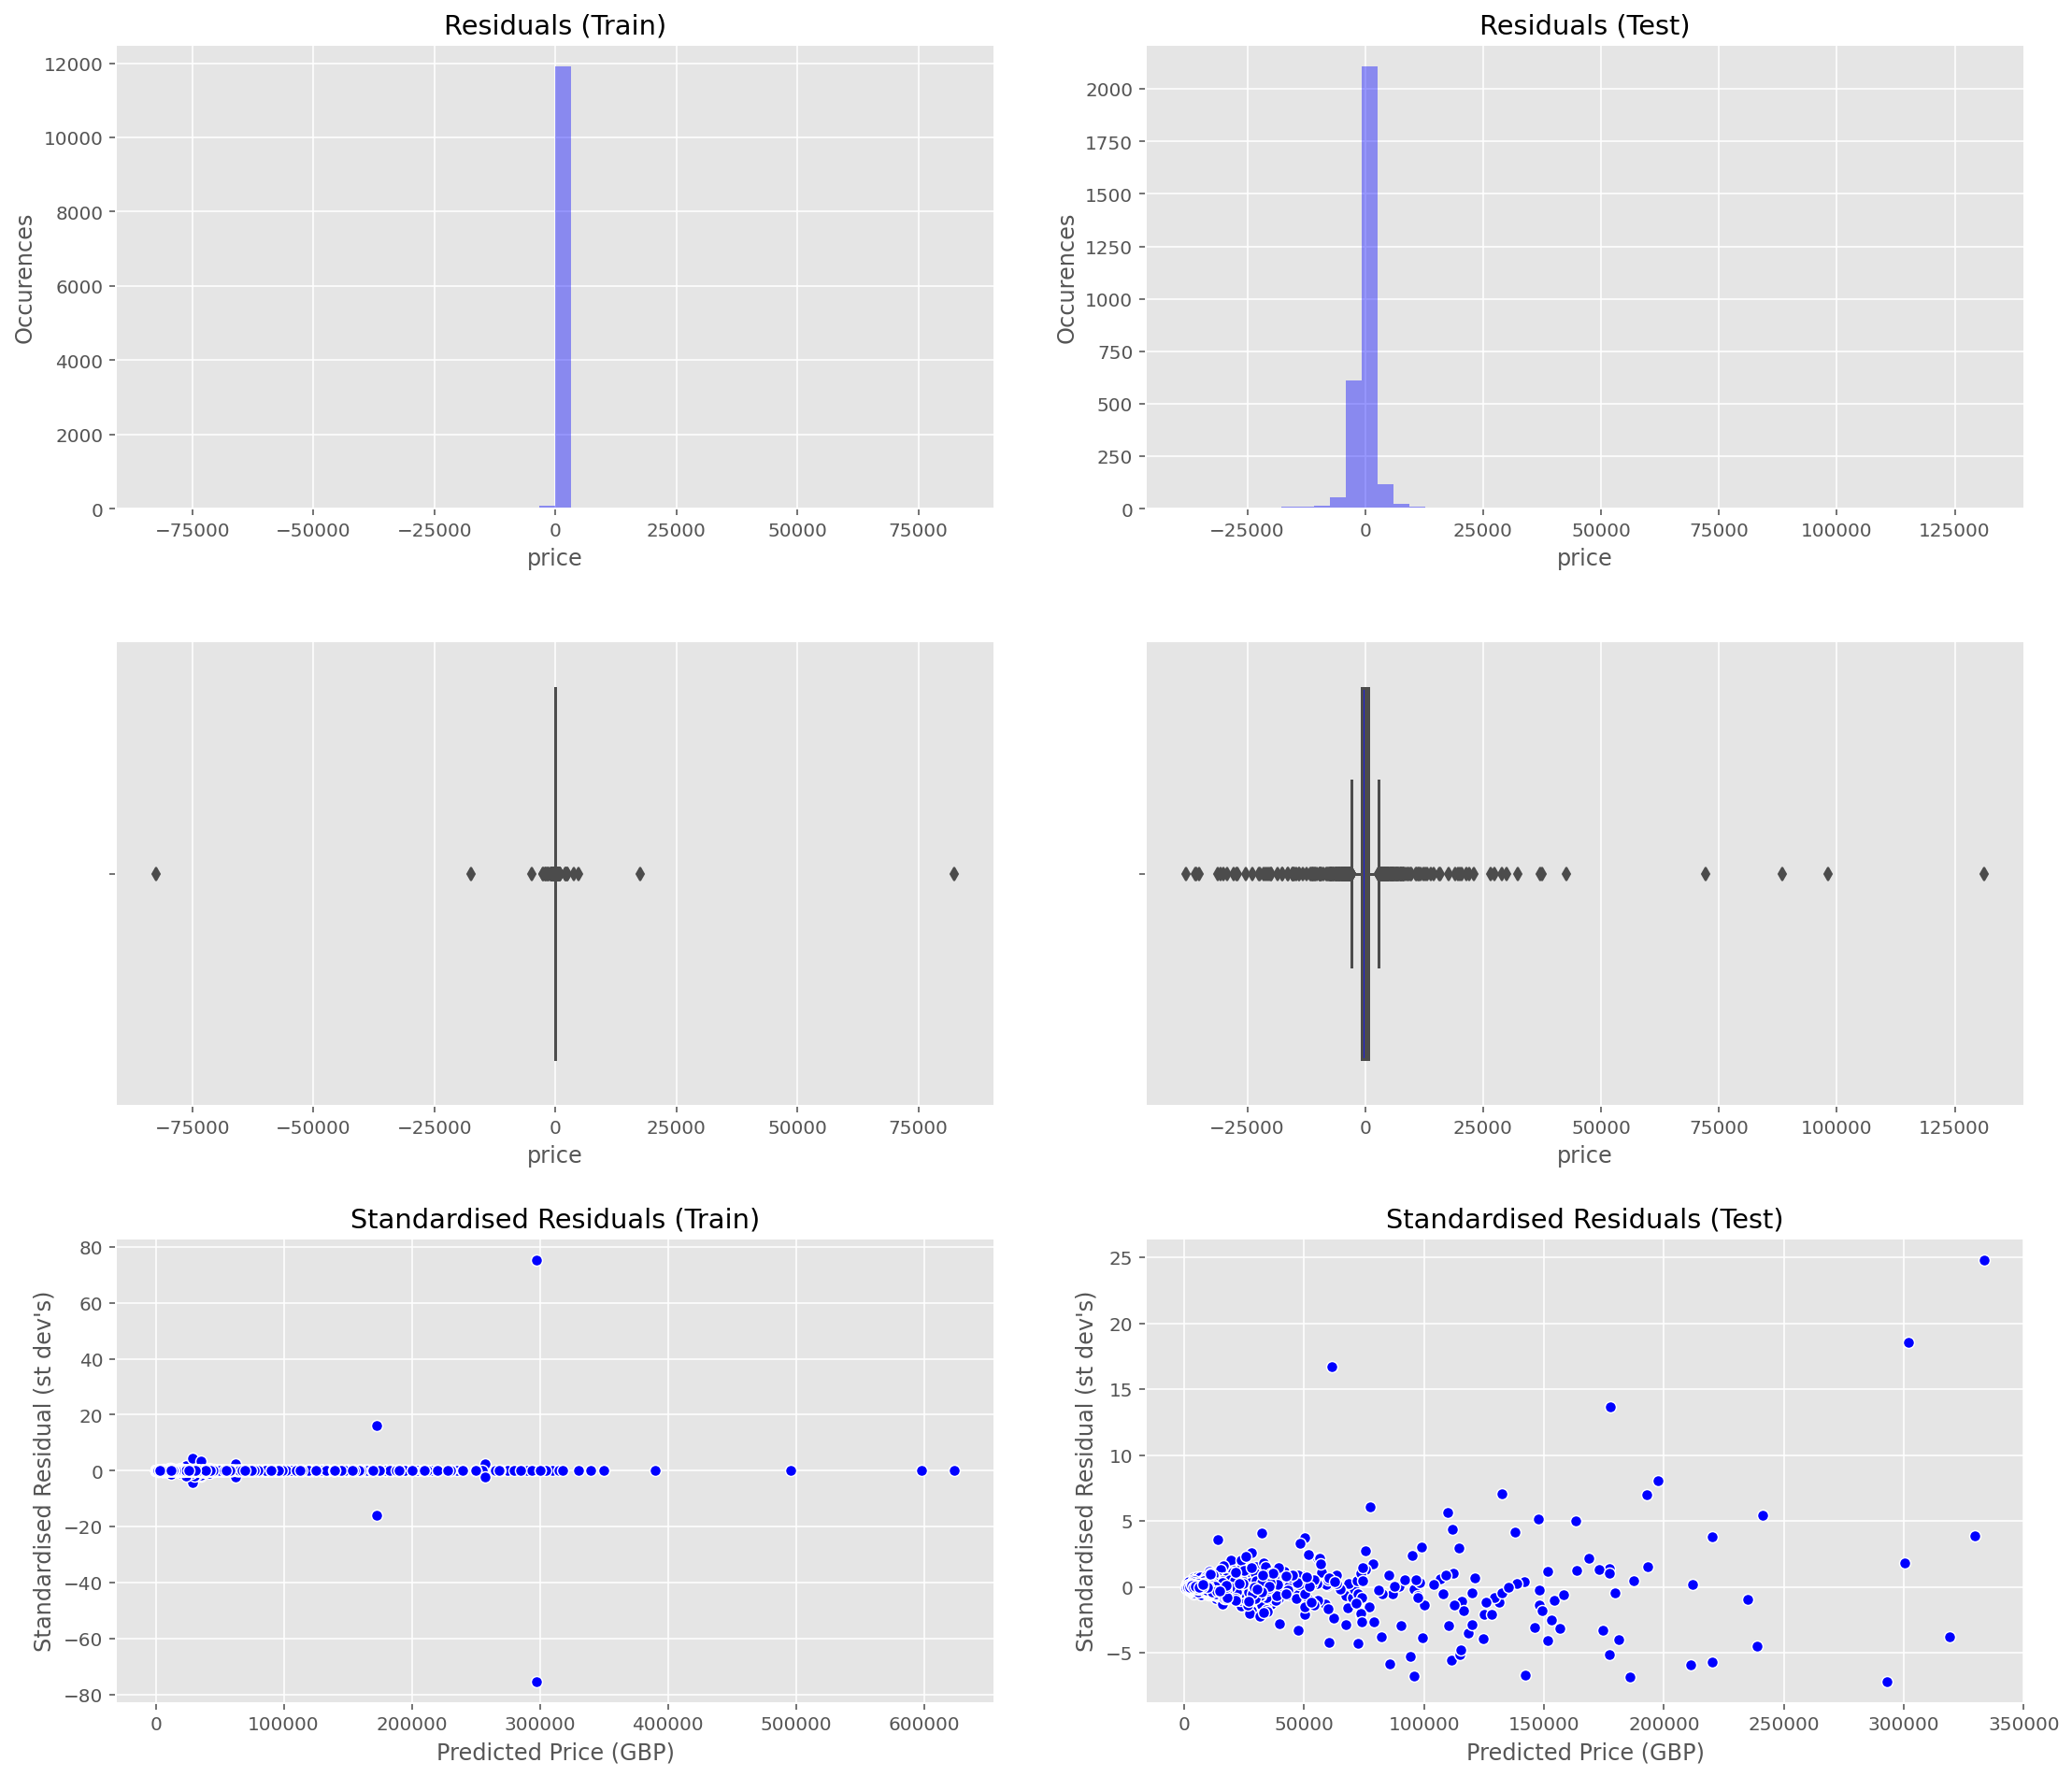

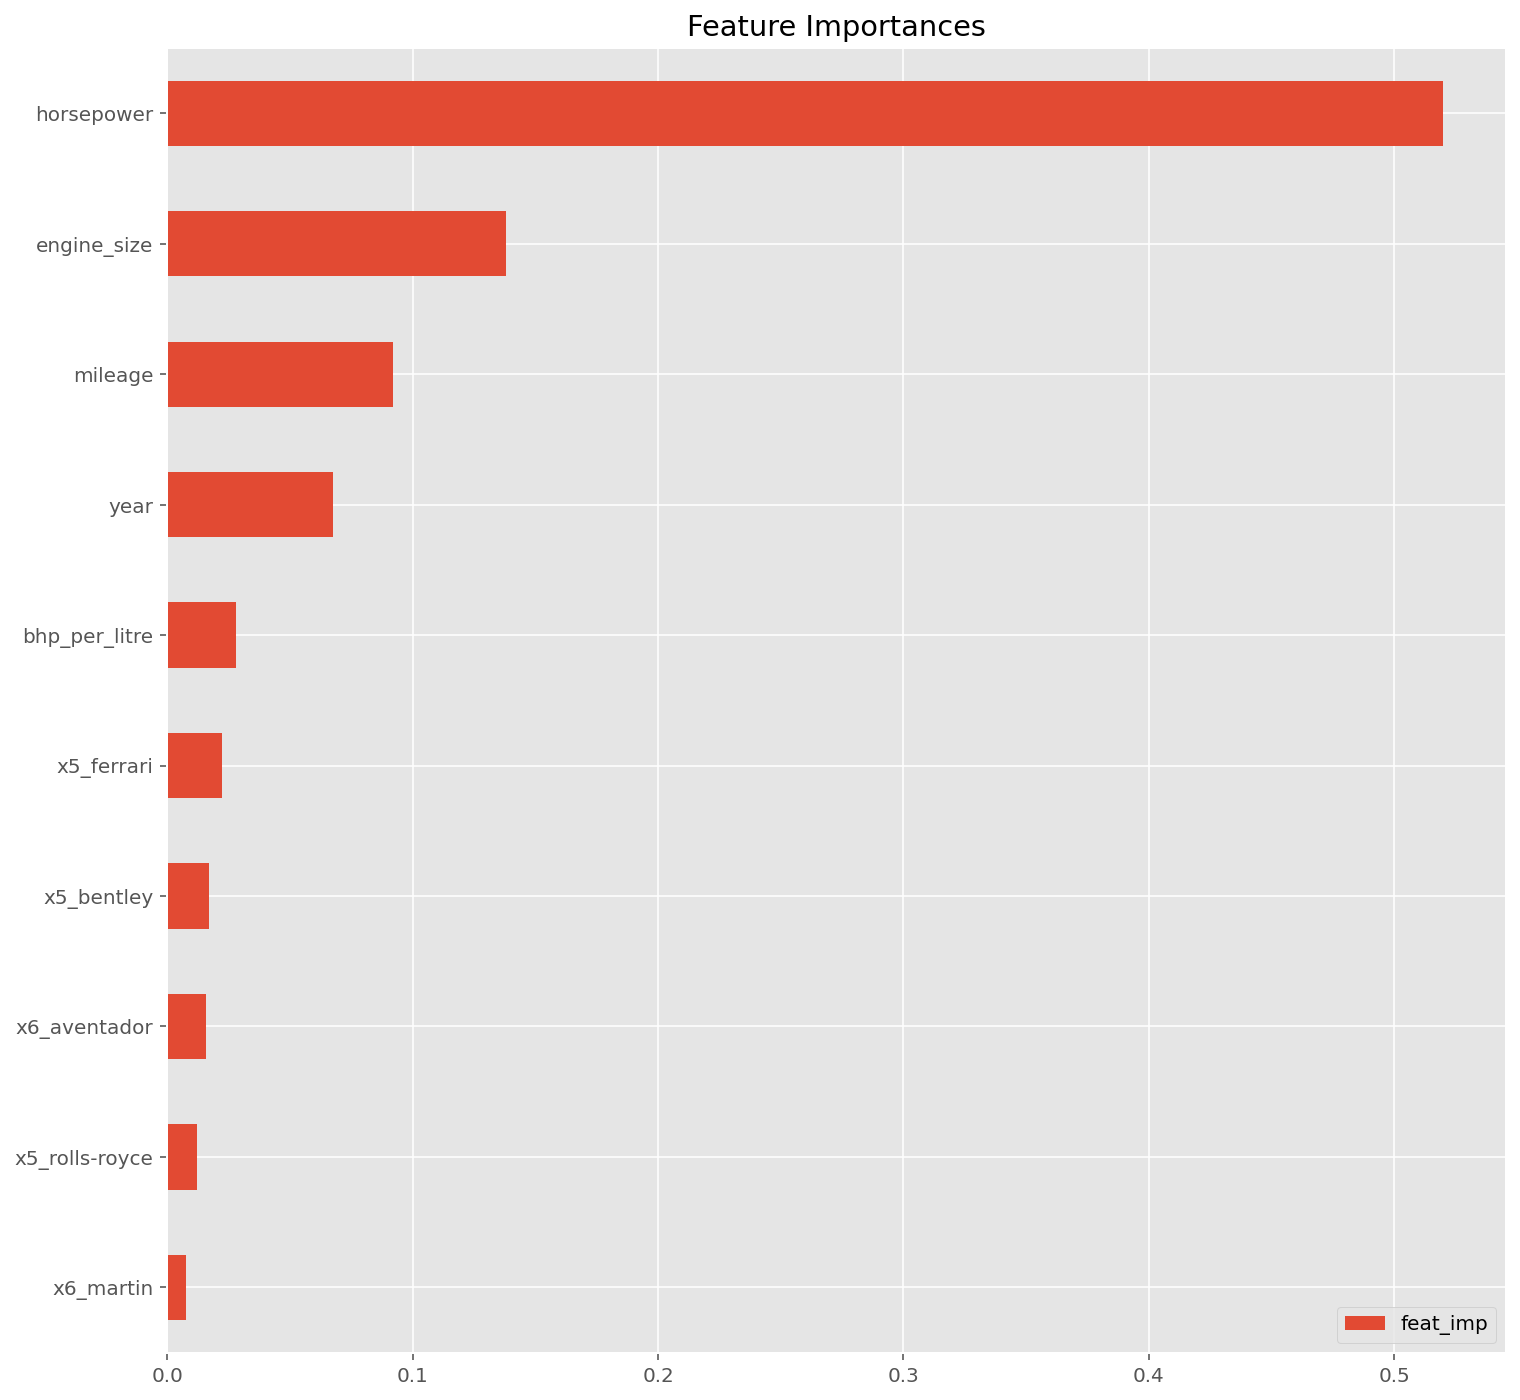

In [14]:
# ExtraTreesRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, ExtraTreesRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# plots
myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

In [16]:
# # dump pipe and model to disk
# dump(pipe, filename='autotrader_etr_pipe.joblib')

['autotrader_etr_pipe.joblib']